<a href="https://colab.research.google.com/github/Fawzy-AI-Explorer/Market-Price-Prediction/blob/main/MarketPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [10]:
data = pd.read_csv ("https://raw.githubusercontent.com/Fawzy-AI-Explorer/Market-Price-Prediction/main/MarketPricePrediction.csv")

In [11]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [12]:
data.shape

(10227, 10)

In [13]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

 market ---: The market or commodity under consideration.<br>
 month ---: The month for which the data is recorded.<br>
 year     ---: The year corresponding to the recorded data.<br>
 quantity ---: The quantity of the commodity traded or available.<br>
 priceMin ---: The minimum price of the commodity during the month.<br>
 priceMax ---: The maximum price of the commodity during the month.<br>
 priceMod ---: The mode or most frequently occurring price of the commodity during the month.<br>
 state ---: The state or region where the market is located.<br>
 city ---: The city where the market is situated.<br>
 date ---: The specific date of the recorded data.<br>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10227.0,2009.022294,4.372841,1996.0,2006.0,2009.0,2013.0,2016.0
quantity,10227.0,76604.880023,124408.698759,20.0,8898.0,27460.0,88356.5,1639032.0
priceMin,10227.0,646.944363,673.121850,16.0,209.0,440.0,828.0,6000.0
priceMax,10227.0,1212.760731,979.658874,145.0,557.0,923.0,1527.0,8192.0
priceMod,10227.0,984.284345,818.471498,80.0,448.0,747.0,1248.0,6400.0


In [16]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [28]:
data.head(-20)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10202,YEOLA(MS),October,2015,15593,1046,3537,2886,MS,YEOLA,October-2015
10203,YEOLA(MS),November,2004,10190,160,396,320,MS,YEOLA,November-2004
10204,YEOLA(MS),November,2005,3796,420,1139,994,MS,YEOLA,November-2005
10205,YEOLA(MS),November,2006,29782,195,566,457,MS,YEOLA,November-2006


In [18]:
data["market"].value_counts()

market
LASALGAON(MS)         242
PIMPALGAON(MS)        224
MANMAD(MS)            218
LONAND(MS)            211
MAHUVA(GUJ)           210
                     ... 
RAJAHMUNDRY(AP)         1
SRIGANGANAGAR(RAJ)      1
MEERUT(UP)              1
CHALLAKERE(KNT)         1
NEEMUCH(MP)             1
Name: count, Length: 120, dtype: int64

In [25]:
data["market"].unique()


21

In [20]:
data["market"].nunique()

120

<Axes: xlabel='state'>

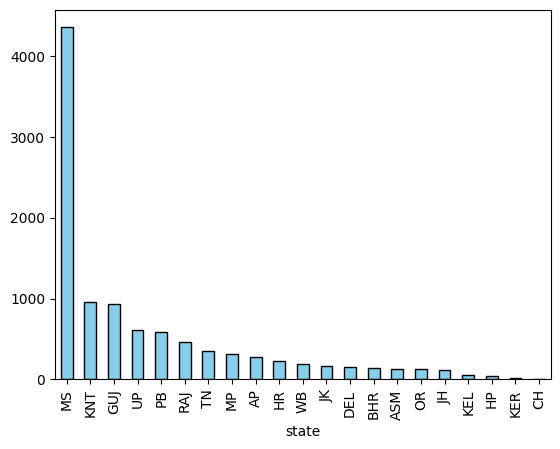

In [34]:
# data["market"].plot(kind = "hist", bins = 2)
data['state'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')


In [26]:
 data["state"].nunique()

21

In [21]:
data["month"].value_counts()

month
February     930
January      929
December     873
November     856
September    855
May          838
October      831
June         827
April        826
July         825
March        820
August       817
Name: count, dtype: int64

In [22]:
data["city"].value_counts()

city
LASALGAON        242
PIMPALGAON       224
MANMAD           218
LONAND           211
MAHUVA           210
                ... 
SRIGANGANAGAR      1
MEERUT             1
RAJAHMUNDRY        1
NEEMUCH            1
CHALLAKERE         1
Name: count, Length: 117, dtype: int64

In [23]:
data["city"].nunique()

117